In [1]:
import os
import time
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 252 samples in 0.000s...
[t-SNE] Computed neighbors for 252 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 252 / 252
[t-SNE] Mean sigma: 1.865047
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.370766
[t-SNE] KL divergence after 300 iterations: 0.619065
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 252 samples in 0.000s...
[t-SNE] Computed neighbors for 252 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 252 / 252
[t-SNE] Mean sigma: 1.881415
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.422806
[t-SNE] KL divergence after 300 iterations: 0.793158
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 252 samples in 0.000s...
[t-SNE] Computed neighbors for 252 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 252 / 252
[t-SNE] Mean sigma: 1.824513
[t-SNE] KL divergence after 250 iterati

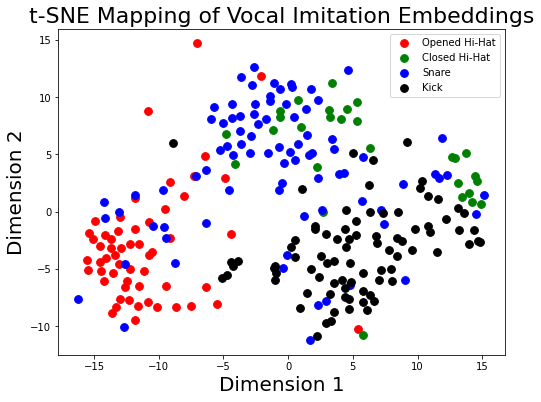

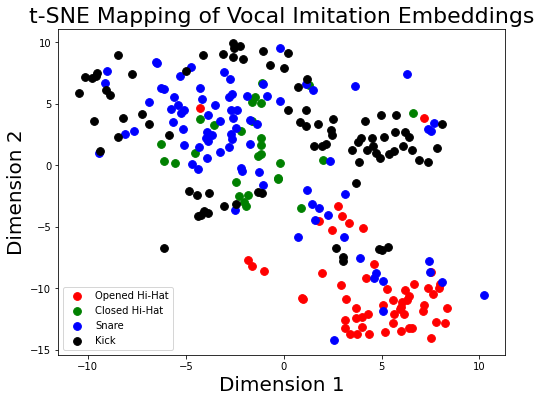

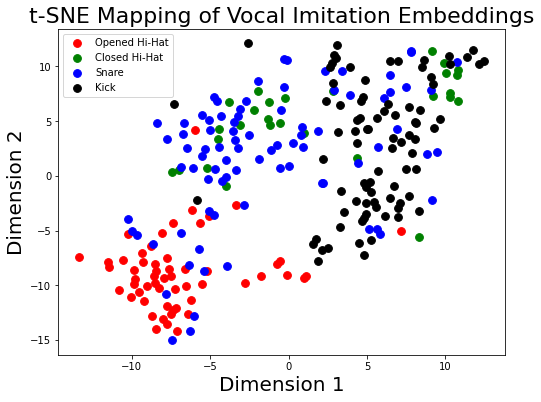

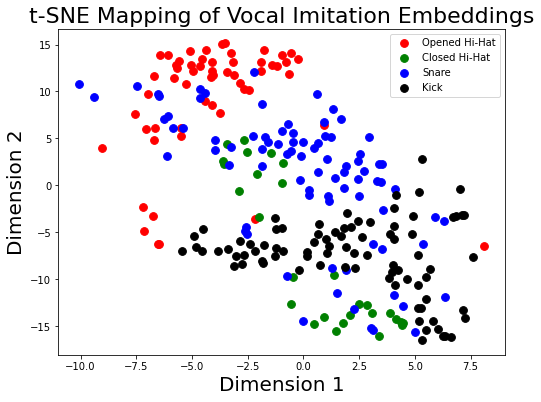

In [2]:
# Check embeddings through t-SNE

embeddings_ref = np.load('../../data/processed/RI/embeddings_ref_RI_0.npy')
embeddings_imi = np.load('../../data/processed/RI/embeddings_imi_RI_0.npy')

classes_ref = np.array([1,1,0,0,0,0,3,3,3,3,3,3,2,2,2,2,2,2])
classes_imi = np.array([1,1,0,0,0,0,3,3,3,3,3,3,2,2,2,2,2,2]*14)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(embeddings_imi)

fig = plt.figure(figsize=(8,6))
plt.title('t-SNE Mapping of Vocal Imitation Embeddings', fontsize=22)
plt.xlabel('Dimension 1', fontsize=20)
plt.ylabel('Dimension 2', fontsize=20)
indices = np.where(classes_imi==0)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='red', label='Opened Hi-Hat', s=60)
indices = np.where(classes_imi==1)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='green', label='Closed Hi-Hat', s=60)
indices = np.where(classes_imi==2)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='blue', label='Snare', s=60)
indices = np.where(classes_imi==3)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='black', label='Kick', s=60)
plt.legend()

# Check embeddings through t-SNE

embeddings_ref = np.load('../../data/processed/KSH/embeddings_ref_KSH_0.npy')
embeddings_imi = np.load('../../data/processed/KSH/embeddings_imi_KSH_0.npy')

classes_ref = np.array([1,1,0,0,0,0,3,3,3,3,3,3,2,2,2,2,2,2])
classes_imi = np.array([1,1,0,0,0,0,3,3,3,3,3,3,2,2,2,2,2,2]*14)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(embeddings_imi)

fig = plt.figure(figsize=(8,6))
plt.title('t-SNE Mapping of Vocal Imitation Embeddings', fontsize=22)
plt.xlabel('Dimension 1', fontsize=20)
plt.ylabel('Dimension 2', fontsize=20)
indices = np.where(classes_imi==0)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='red', label='Opened Hi-Hat', s=60)
indices = np.where(classes_imi==1)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='green', label='Closed Hi-Hat', s=60)
indices = np.where(classes_imi==2)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='blue', label='Snare', s=60)
indices = np.where(classes_imi==3)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='black', label='Kick', s=60)
plt.legend()

# Check embeddings through t-SNE

embeddings_ref = np.load('../../data/processed/RI_KSH/embeddings_ref_RI_KSH_0.npy')
embeddings_imi = np.load('../../data/processed/RI_KSH/embeddings_imi_RI_KSH_0.npy')

classes_ref = np.array([1,1,0,0,0,0,3,3,3,3,3,3,2,2,2,2,2,2])
classes_imi = np.array([1,1,0,0,0,0,3,3,3,3,3,3,2,2,2,2,2,2]*14)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(embeddings_imi)

fig = plt.figure(figsize=(8,6))
plt.title('t-SNE Mapping of Vocal Imitation Embeddings', fontsize=22)
plt.xlabel('Dimension 1', fontsize=20)
plt.ylabel('Dimension 2', fontsize=20)
indices = np.where(classes_imi==0)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='red', label='Opened Hi-Hat', s=60)
indices = np.where(classes_imi==1)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='green', label='Closed Hi-Hat', s=60)
indices = np.where(classes_imi==2)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='blue', label='Snare', s=60)
indices = np.where(classes_imi==3)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='black', label='Kick', s=60)
plt.legend()


# Check embeddings through t-SNE

embeddings_ref = np.load('../../data/processed/unsupervised/embeddings_ref_unsupervised_0.npy')
embeddings_imi = np.load('../../data/processed/unsupervised/embeddings_imi_unsupervised_0.npy')

classes_ref = np.array([1,1,0,0,0,0,3,3,3,3,3,3,2,2,2,2,2,2])
classes_imi = np.array([1,1,0,0,0,0,3,3,3,3,3,3,2,2,2,2,2,2]*14)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(embeddings_imi)

fig = plt.figure(figsize=(8,6))
plt.title('t-SNE Mapping of Vocal Imitation Embeddings', fontsize=22)
plt.xlabel('Dimension 1', fontsize=20)
plt.ylabel('Dimension 2', fontsize=20)
indices = np.where(classes_imi==0)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='red', label='Opened Hi-Hat', s=60)
indices = np.where(classes_imi==1)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='green', label='Closed Hi-Hat', s=60)
indices = np.where(classes_imi==2)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='blue', label='Snare', s=60)
indices = np.where(classes_imi==3)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='black', label='Kick', s=60)
plt.legend()


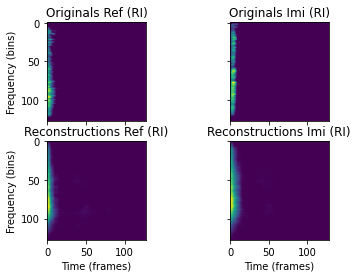

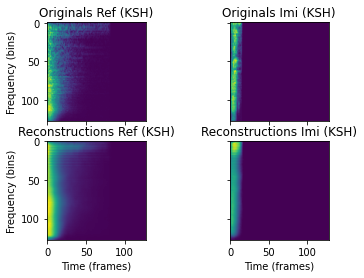

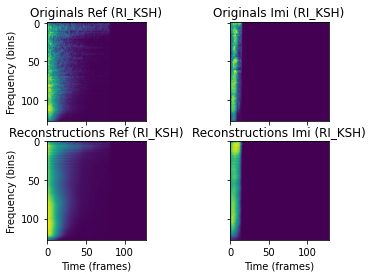

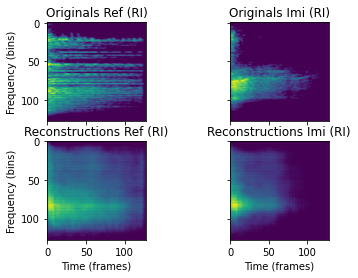

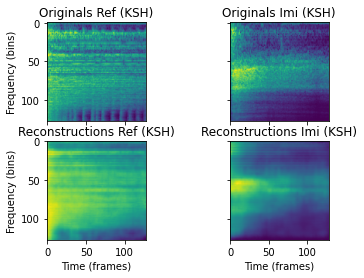

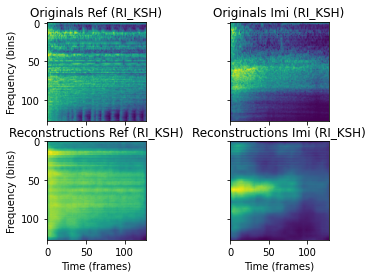

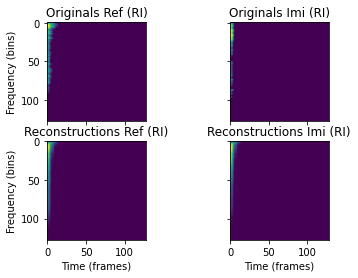

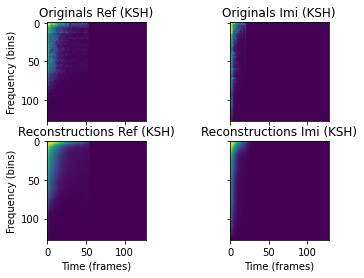

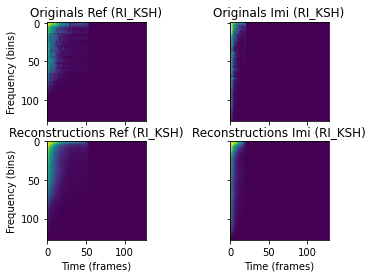

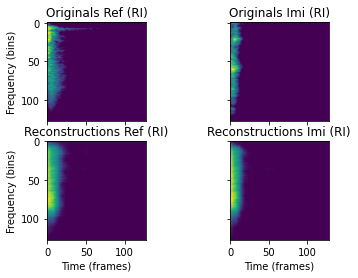

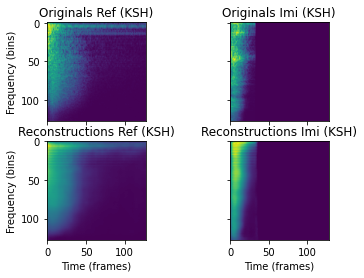

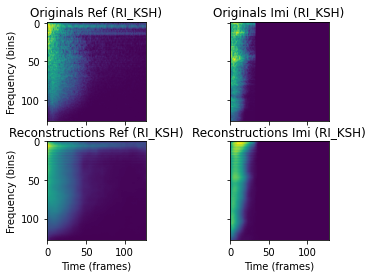

In [2]:
reconstructions_ref_0 = np.load('../../data/processed/reconstructions/adib/reconstructions_ref_adib_0.npy')
reconstructions_imi_0 = np.load('../../data/processed/reconstructions/adib/reconstructions_imi_adib_0.npy')
originals_ref_0 = np.load('../../data/processed/reconstructions/adib/originals_ref_adib_0.npy')
originals_imi_0 = np.load('../../data/processed/reconstructions/adib/originals_imi_adib_0.npy')

reconstructions_ref_1 = np.load('../../data/processed/reconstructions/KSH/reconstructions_ref_KSH_0.npy')
reconstructions_imi_1 = np.load('../../data/processed/reconstructions/KSH/reconstructions_imi_KSH_0.npy')
originals_ref_1 = np.load('../../data/processed/reconstructions/KSH/originals_ref_KSH_0.npy')
originals_imi_1 = np.load('../../data/processed/reconstructions/KSH/originals_imi_KSH_0.npy')

reconstructions_ref_2 = np.load('../../data/processed/reconstructions/RI_KSH/reconstructions_ref_RI_KSH_0.npy')
reconstructions_imi_2 = np.load('../../data/processed/reconstructions/RI_KSH/reconstructions_imi_RI_KSH_0.npy')
originals_ref_2 = np.load('../../data/processed/reconstructions/RI_KSH/originals_ref_RI_KSH_0.npy')
originals_imi_2 = np.load('../../data/processed/reconstructions/RI_KSH/originals_imi_RI_KSH_0.npy')

reconstructions_ref_3 = np.load('../../data/processed/reconstructions/unsupervised/reconstructions_ref_unsupervised_0.npy')
reconstructions_imi_3 = np.load('../../data/processed/reconstructions/unsupervised/reconstructions_imi_unsupervised_0.npy')
originals_ref_3 = np.load('../../data/processed/reconstructions/unsupervised/originals_ref_unsupervised_0.npy')
originals_imi_3 = np.load('../../data/processed/reconstructions/unsupervised/originals_imi_unsupervised_0.npy')

ns = [0,4,9,15]

for n in ns:

    fig, axs = plt.subplots(2, 2)
    axs[0, 0].imshow(originals_ref_0[n,:,:,0])
    axs[0, 0].set_title('Originals Ref (RI)')
    axs[1, 0].imshow(reconstructions_ref_0[n,:,:,0])
    axs[1, 0].set_title('Reconstructions Ref (RI)')
    axs[0, 1].imshow(originals_imi_0[n,:,:,0])
    axs[0, 1].set_title('Originals Imi (RI)')
    axs[1, 1].imshow(reconstructions_imi_0[n,:,:,0])
    axs[1, 1].set_title('Reconstructions Imi (RI)')
    for ax in axs.flat:
        ax.set(xlabel='Time (frames)', ylabel='Frequency (bins)')
    for ax in axs.flat:
        ax.label_outer()

    fig, axs = plt.subplots(2, 2)
    axs[0, 0].imshow(originals_ref_1[n,:,:,0])
    axs[0, 0].set_title('Originals Ref (KSH)')
    axs[1, 0].imshow(reconstructions_ref_1[n,:,:,0])
    axs[1, 0].set_title('Reconstructions Ref (KSH)')
    axs[0, 1].imshow(originals_imi_1[n,:,:,0])
    axs[0, 1].set_title('Originals Imi (KSH)')
    axs[1, 1].imshow(reconstructions_imi_1[n,:,:,0])
    axs[1, 1].set_title('Reconstructions Imi (KSH)')
    for ax in axs.flat:
        ax.set(xlabel='Time (frames)', ylabel='Frequency (bins)')
    for ax in axs.flat:
        ax.label_outer()

    fig, axs = plt.subplots(2, 2)
    axs[0, 0].imshow(originals_ref_2[n,:,:,0])
    axs[0, 0].set_title('Originals Ref (RI_KSH)')
    axs[1, 0].imshow(reconstructions_ref_2[n,:,:,0])
    axs[1, 0].set_title('Reconstructions Ref (RI_KSH)')
    axs[0, 1].imshow(originals_imi_2[n,:,:,0])
    axs[0, 1].set_title('Originals Imi (RI_KSH)')
    axs[1, 1].imshow(reconstructions_imi_2[n,:,:,0])
    axs[1, 1].set_title('Reconstructions Imi (RI_KSH)')
    for ax in axs.flat:
        ax.set(xlabel='Time (frames)', ylabel='Frequency (bins)')
    for ax in axs.flat:
        ax.label_outer()

In [4]:
np.load('../../data/processed/reconstructions/RI_KSH/reconstructions_imi_RI_KSH_0.npy').shape

(252, 128, 128, 1)

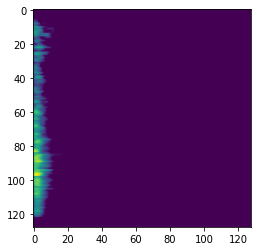

In [8]:
reconstructions_ref_0 = np.load('../../data/processed/reconstructions/adib/reconstructions_ref_adib_0.npy')
reconstructions_imi_0 = np.load('../../data/processed/reconstructions/adib/reconstructions_imi_adib_0.npy')
originals_ref_0 = np.load('../../data/processed/reconstructions/adib/originals_ref_adib_0.npy')
originals_imi_0 = np.load('../../data/processed/reconstructions/adib/originals_imi_adib_0.npy')

plt.figure()
plt.imshow(originals_ref_0[0])
plt.show()
